# Análisis del riesgo de incumplimiento de los prestatarios


# Tabla de contenidos:
1.  [Introducción](#id0)
    1. [Objetivos](#ide0.1)
2.  [Explora los datos](#id1)
3.  [Transformación de datos](#id3)
4.  [Trabajar con valores ausentes](#id4)
    1.  [Restaurar valores ausentes en `total_income`](#id4.1)
    2.  [Restaurar valores en `days_employed`](#id4.2)
5.  [Clasificación de datos](#id5)
6.  [Comprobación de las hipótesis](#id6)
7.  [Conclusión general](#id7)

## Introducción<a name="id0"></a>

Preparar un informe para la división de préstamos de un banco. Averiguar si el estado civil, el número de hijos, rango salarial, y propósito del préstamo de un cliente tienen un impacto en el incumplimiento de pago de un préstamo. Se busca obtener un informe que se tendrá en cuenta al crear una puntuación de crédito para un cliente potencial. Se utiliza una puntuación de crédito para evaluar la capacidad de un prestatario potencial para pagar su préstamo.

### Objetivos<a name="id0.1"></a>

-  Averiguar si hay alguna conexión entre tener hijos y pagar un préstamo a tiempo.
-  Averiguar si existe una conexión entre el estado civil y el pago a tiempo de un préstamo.
-  Averiguar si existe una conexión entre el nivel de ingresos y el pago a tiempo de un préstamo.
-  Averiguar cómo afectan los diferentes propósitos del préstamo al reembolso a tiempo del préstamo.


##  Explora los datos<a name="id1"></a>

In [1]:
# Cargar todas las librerías

import pandas as pd
import seaborn as sns

In [2]:
# Carga los datos

try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')

**Descripción de los datos**
- `children` - el número de hijos en la familia
- `days_employed` - experiencia laboral en días
- `dob_years` - la edad del cliente en años
- `education` - la educación del cliente
- `education_id` - identificador de educación
- `family_status` - estado civil
- `family_status_id` - identificador de estado civil
- `gender` - género del cliente
- `income_type` - tipo de empleo
- `debt` - ¿había alguna deuda en el pago de un préstamo?
- `total_income` - ingreso mensual
- `purpose` - el propósito de obtener un préstamo


In [3]:
# vamos a mostrar las 20 primeras filas
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Se puede observar a primera vista que existen datos ausentes en varias columnas, valores negativos, por ejemplo en `days_employed`, valores duplicados, por ejemplo en la columna `education` datos como `secondary education` y `Secondary Education`.


Se revisarán estas observaciones y si requerirán cambios adicionales.


In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Existen `2174` valores ausentes en `days_employed` y también `2174` valores ausentes en `total_income`.

In [5]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos

df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Se puede notar que al buscar datos ausentes en `days_employed` también hay valores ausentes en `total_income` a la vez.

Revisaremos a continuación si todos los datos ausentes coinciden en ambas columnas a la vez.

In [6]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.
filter_nan = df[(df['days_employed'].isna()) & (df['total_income'].isna())]

# Comprobamos el número de filas que tiene la tabla filtrada
len(filter_nan)

2174

In [7]:
percent_nan = filter_nan.shape[0]/df.shape[0]
print(f'Valores ausentes: {percent_nan:.0%}')

Valores ausentes: 10%


**Conclusión intermedia**

- El número de filas `2174` en la tabla filtrada de NaN coincide con el número de valores ausentes por columna. Entonces, se confirma que los `NaN` en la columnas  `days_employed` y `total_income` se presentan al mismo tiempo, es decir se encuentran totalmente relacionados.
- Esto quiere decir, que las personas que no tienen registro en experiencia laboral, tampoco tienen registro de que perciben un sueldo, en ambos casos el dato refleja `NaN`.
- Los registros con valores ausentes representa el `10%` de todos los registros.
- Se revisará más a fondo si los valores ausentes depende de otras características de los clientes.

In [8]:
# Vamos a investigar si los clientes con datos ausentes son "desempleados".

unemployed_nan = (filter_nan['income_type'] == 'unemployed').sum()
print('Desempleados entre registros con datos ausentes:', unemployed_nan)

Desempleados entre registros con datos ausentes: 0


**Posibles razones por las que hay valores ausentes en los datos**


`Referente al tipo de empleo:` Se podría pensar que de no existir datos de días laborales y de ingresos puede deberse a que el cliente está desempleado. Pero como podemos comprobar  el total de desempleados entre registros con datos ausentes es  0. Quedando descartada esta suposición.

Revisemos más, acerca del tipo de empleo de los clientes y su distribución en los datos.

In [9]:
print('\nTotales por tipos de empleo en tabla filtrada NaN:')
print(filter_nan['income_type'].value_counts())


Totales por tipos de empleo en tabla filtrada NaN:
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64


In [10]:
print('Totales por tipos de empleo en todos los datos:')
print(df['income_type'].value_counts())

Totales por tipos de empleo en todos los datos:
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


In [11]:
# Revisamos % de income_type de la tabla filtrada NaN respecto al conjunto de datos entero

income_type_conversion = filter_nan['income_type'].value_counts().head(3) / df['income_type'].value_counts().head(3)
income_type_conversion

employee    0.099379
business    0.099902
retiree     0.107106
Name: income_type, dtype: float64

**Conclusión intermedia**

`Referente al tipo de empleo:` se puede notar que el comportamiento no cambia dentro de los datos totales y dentro de los datos ausentes. En otras palabras, se observa que en los NaN el `10%` de cada categoría de tipo de empleo son similares a los de los datos completos.

A continuación revisaremos el comportamiento de los datos con educación.

In [12]:
print('\nNivel de educación:\n')
print(filter_nan['education'].str.lower().value_counts().head(3))


Nivel de educación:

secondary education    1540
bachelor's degree       544
some college             69
Name: education, dtype: int64


In [13]:
print(df['education'].str.lower().value_counts().head(3))

secondary education    15233
bachelor's degree       5260
some college             744
Name: education, dtype: int64


In [14]:
# Revisaremos % del nivel de educación de la tabla filtrada NaN respecto al conjunto de datos entero

education_conversion = filter_nan['education'].str.lower().value_counts().head(
    3) / df['education'].str.lower().value_counts().head(3)
print(education_conversion)

secondary education    0.101096
bachelor's degree      0.103422
some college           0.092742
Name: education, dtype: float64


**Conclusión intermedia**

`Referente a la educación:` Se descarta que exista un patrón relacionado al nivel de educación con los valores ausentes. Se puede notar el mismo comportamiento en los datos totales y en los datos con valores ausentes.


Continuemos revisando número de hijos, estado civil, sexo...


In [15]:
print('Tasas de conversión de datos ausentes en datos totales')

children_conversion = filter_nan['children'].value_counts().head(
    3) / df['children'].value_counts().head(3)
print('\nNúmero de hijos:')
print(children_conversion)

family_conversion = filter_nan['family_status'].value_counts().head(
    3) / df['family_status'].value_counts().head(3)
print('\nEstado civil:')
print(family_conversion)

gender_conversion = filter_nan['gender'].value_counts().head(
    2) / df['gender'].value_counts().head(2)
print('\nSexo:')
print(gender_conversion)

debt_conversion = filter_nan['debt'].value_counts() / df['debt'].value_counts()
print('\nHa incumplido alguna vez un préstamo?:')
print(debt_conversion)

Tasas de conversión de datos ausentes en datos totales

Número de hijos:
0    0.101703
1    0.098589
2    0.099270
Name: children, dtype: float64

Estado civil:
married              0.099919
civil partnership    0.105818
unmarried            0.102382
Name: family_status, dtype: float64

Sexo:
F    0.104243
M    0.094676
Name: gender, dtype: float64

Ha incumplido alguna vez un préstamo?:
0    0.101294
1    0.097645
Name: debt, dtype: float64


**Conclusiones**

Al igual que las comprobaciones pasadas, se puede observar que el comportamiento de los clientes respecto al número de hijos, estado civil, etc., sigue siendo igual dentro de todos los datos como solo en los datos con valores ausentes.


Por lo tanto, no se encuentra un patrón que indique que existe alguna relación entre otra característica de los clientes con los datos ausentes encontrados en días laborales y total de ingresos. 


Los valores ausentes de días laborales se relacionan directamente con los valores ausentes en el total de ingresos como se mencionó inicialmente.

A continuación se abordará diferentes tipos de problemas: duplicados, diferentes registros, artefactos incorrectos y valores ausentes.

## Transformación de datos<a name="id3"></a>

In [16]:
df['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [17]:
# cambiamos las categorías de educación todo a minúsculas
df['education'] = df['education'].str.lower()

In [18]:
df['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

Hemos corregido las categorías de educación colocando todo en minúscula nos hemos librado de categorías duplicadas como secondary education. 

Ahora revisemos los datos de la columna `children`

In [19]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Se pueden observar el -1 y 20 son valores extraños en número de hijos. En total suman 123 registros errones que corresponde a 0.0057%. Estos valores son datos problemas, puesto que deben ser solo valores positivos, y 20 corresponde a un valor atípico también por ser absurdamente alto.

A continuación vamos a reemplazar estos valores atípicos por la mediana

In [20]:
# Calculamos la mediana de la columna children
median_children = df['children'].median()
median_children = int(median_children)
median_children

0

In [21]:
# Reemplazamos el valor de la mediana donde se encuentren -1 y 20 hijos
df.loc[(df['children'] == -1) | (df['children'] == 20),
       'children'] = median_children

In [22]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado
df['children'].value_counts()

0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Hemos corregido los valores de -1 y 20 en la columna children, identificados como valores extraños y reemplazados por su mediana, siendo esta 0, y siendo 0 el valor más repetido también dentro de los datos.

Ahora revisemos los datos en la columna `days_employed`. 

In [23]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

In [24]:
# Revisamos % de los valores negativos de días laborados
porcent = len(df[df['days_employed'] < 0]) / len(df['days_employed'])
print(f'Negativos dentro de days_employed: { porcent:.0%}')

Negativos dentro de days_employed: 74%


In [25]:
# Revisamos los valores de dias laborados ya que parecen excesivamente altos. Mostremos la equivalencia en años
(df.days_employed/365).describe()

count    19351.000000
mean       172.730131
std        385.828252
min        -50.380685
25%         -7.527188
50%         -3.296903
75%         -0.797523
max       1100.699727
Name: days_employed, dtype: float64

-  Podemos notar en `days_employed` que el 74% de los datos son valores negativos, representando la mayoría de los datos de esta columna. Se desconoce el motivo por qué están negativos los valores, pero podría deberse a problemas técnicos al ingreso o exportación de los datos.


-  También notamos que los valores positivos en esta columna, tiene valores excesivamente altos para representar a días laborados por un cliente. Revisando la equivalencia en años podemos confirmar que hay un problema, ya que el valor mayor en años trabajados es de 1100 y la media es de 172 años, esto sería irreal.


-  A continuación, transformaremos todos los valores positivos que representan a los valores atípicamente grandes por NaN, y cambiaremos a positivos los valores negativos que identificamos.

In [26]:
# Aborda los valores problemáticos: atípicamente grandes

# Filtremos cuales los valores positivos grandes
df[df.days_employed > 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car


In [27]:
#  Convirtamos a NaN los valores atípicamente grandes
df.loc[df.days_employed > 0, 'days_employed'] = None

In [28]:
#  Comprobamos que fueron reemplazados por NaN
len(df[df.days_employed > 0])

0

In [29]:
# Revisemos total de NaN
df.days_employed.isna().sum()

5619

Se reemplazaron 3.445 valores positivos por NaN y finalmente quedan en total 5.619 NaN en la columna `day_employed`.

In [30]:
# convertir a positivos todos los valores negativos
df['days_employed'] = abs(df['days_employed'])

In [31]:
# Comprobamos que no existan valores negativos
len(df[df['days_employed'] < 0])

0

In [32]:
df.days_employed.describe()

count    15906.000000
mean      2353.015932
std       2304.243851
min         24.141633
25%        756.371964
50%       1630.019381
75%       3157.480084
max      18388.949901
Name: days_employed, dtype: float64

Hemos corregido los valores atípicamente grandes por valores NaN, esto con el fin de posteriormente realizar el imputamiento de todos los valores ausentes en la columna. Además transformamos todos los valores negativos a positivos. Ahora los datos de la columna `days_employed` se ven coherentes.


Ahora echemos un vistazo a la `dob_years`:

In [33]:
df['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

In [34]:
len(df[df['dob_years'] == 0])

101

In [35]:
df[df['dob_years'] == 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,NaN,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,NaN,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car


In [36]:
porcent_age_cero = len(df[df['dob_years'] == 0]) / len(df['dob_years'])
print(f'{ porcent_age_cero:.1%} son edades con 0')

0.5% son edades con 0


Se encontró que el 0.5% de los datos tienen valores 0 en edad, estos datos serían erróneos. Calculemos la mediana para reemplazar con esta las edades 0. La edad 0 también es el valor más repetido de todos las edades.

In [37]:
# mediana de edad

median_dob_years = int(df[df.dob_years != 0]['dob_years'].median())
median_dob_years

43

In [38]:
# asignamos el valor de la mediana de dob_years a los valores cero.

df.loc[df['dob_years'] == 0, 'dob_years'] = median_dob_years

In [39]:
# Comprueba el resultado
df['dob_years'].sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75], dtype=int64)

In [40]:
len(df[df['dob_years'] == 0])

0

In [41]:
df.dob_years.describe()

count    21525.000000
mean        43.495145
std         12.218213
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Hemos reemplazado por la mediana `43` todos los valores 0 de edades.

Ahora revisemos la columna `family_status` por si existiera algún problema podamos abordar.

In [42]:
df.family_status.value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [43]:
df.family_status.describe()

count       21525
unique          5
top       married
freq        12380
Name: family_status, dtype: object

Los datos de `family_status` están bien. Ahora revisemos la columna `gender`.

In [44]:
# Veamos los valores en la columna
df.gender.value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [45]:
df[df.gender == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


No se encuentra ningún indicio de que exista problemas con las categorías de género, un poco extraño que no se haya definido el genero en el registro 10701 y se indique XNA, pero se puede pensar que el género no ha querido especificarse por parte del cliente.

Ahora vamos a revisar la columna `income_type`. Miremos qué tipo de valores hay y qué problemas puedemos abordar.

In [46]:
df.income_type.value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

Se observan 8 categorías de tipo de empleo de las cuales las 4 primeras son donde están el 99% de los datos.


Ahora veamos si hay `duplicados` en nuestros datos.

In [47]:
df.duplicated().sum()

71

In [48]:
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate


In [49]:
# Eliminamos los duplicados
df = df.drop_duplicates().reset_index(drop=True)

In [50]:
# comprobación duplicados
df.duplicated().sum()

0

In [51]:
# Revisemos los NaN por columnas
df.isna().sum()

children               0
days_employed       5548
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2103
purpose                0
dtype: int64

In [52]:
df.shape

(21454, 12)

El conjunto de datos total disminuyó de 21525 a `21454` registros ya que se eliminaron 71 registros duplicados, representando el  0.003% de todos los datos, casi nada!.

Las columnas con datos ausentes quedan así: `days_employed` 5548 NaN y `total_income` 2103 NaN.

## Trabajar con valores ausentes<a name="id4"></a>

### Restaurar valores ausentes en `total_income`<a name="id4.1"></a>

Como se indicó anteriormente, hay 2 columnas con valores ausentes que vamos a rellenar.

Empezaremos abordando el total de ingresos `total_income`. Crearemos una categoría por edades de clientes, para de esta manera poder realizar más claramente nuestros análisis o revisar por grupos de edades los totales de ingresos.


In [53]:
df.dob_years.sort_values().unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75], dtype=int64)

-  Crearemos 4 grupos de edades:
          Menor a 30 años
          De 30 a 44 años
          De 45 a 64 años
          Mayor a 65 años

In [54]:
# función calcula la categoría de edad

def age_group(df):
    if (df.dob_years < 30):
        return 'menor a 30'
    elif (df.dob_years >= 30) & (df.dob_years < 45):
        return '30 a 44'
    elif (df.dob_years >= 45) & (df.dob_years < 64):
        return '45 a 64'
    else:
        return 'mayor a 65'

In [55]:
# Probamos función
df.apply(age_group, axis=1).head()

0    30 a 44
1    30 a 44
2    30 a 44
3    30 a 44
4    45 a 64
dtype: object

In [56]:
# Crear nueva columna basada en la función
df['age_group'] = df.apply(age_group, axis=1)

In [57]:
# Comprobar los valores en la nueva columna
df.age_group.value_counts()

30 a 44       8628
45 a 64       8491
menor a 30    3180
mayor a 65    1155
Name: age_group, dtype: int64

In [58]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien

df_nonan = df.dropna(subset=['days_employed', 'total_income'])
df_nonan.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [59]:
df_nonan.shape

(15906, 13)

In [60]:
df_nonan.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,30 a 44
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30 a 44
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30 a 44
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30 a 44
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,menor a 30


Revisaremos la distribución de edad y eduación con los ingresos.

<AxesSubplot: xlabel='age_group'>

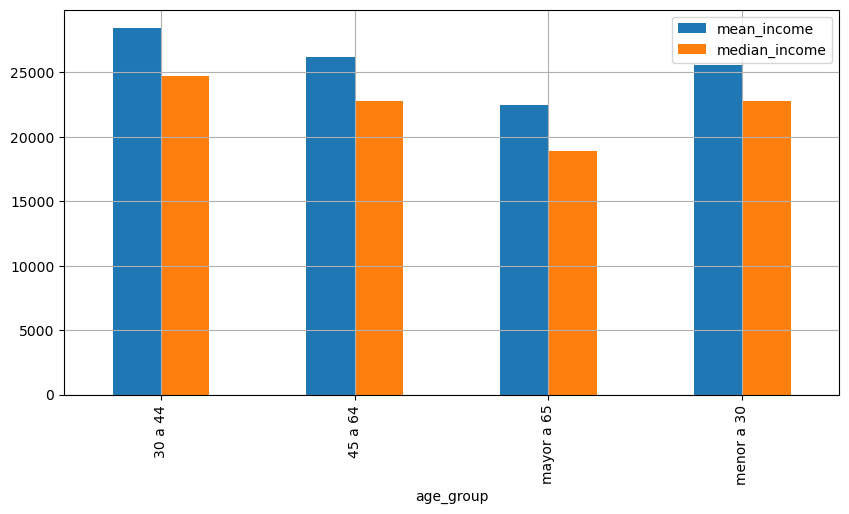

In [61]:
# Revisemos la distribución de los ingresos por grupos de edad

ages_income = df.groupby(['age_group']).agg({'total_income': ['mean', 'median']})
ages_income.columns = ['mean_income', 'median_income']
ages_income.plot(kind='bar', figsize=(10, 5), grid=True)

Vemos que los clientes que tiene menor nivel adquisitivo son los mayores a 65 años. Por lo contrario, observamos que los clientes entre 30 a 44 años son los que tienen mayores ingresos.

<AxesSubplot: xlabel='education'>

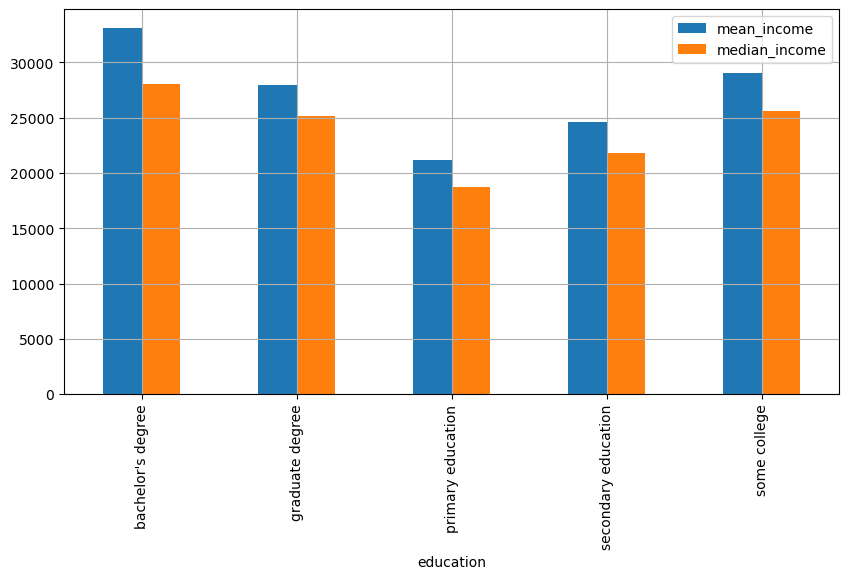

In [62]:
# Revisemos la distribución de los ingresos por grupos de educación

education_income = df.groupby(['education']).agg({'total_income': ['mean', 'median']})
education_income.columns = ['mean_income', 'median_income']
education_income.plot(kind='bar', figsize=(10, 5), grid=True)

Podemos observar que los clientes que cuentan con mayor nivel educativo (Universidad) son los que poseen los más altos de ingresos. Por lo contrario, los clientes con menos estudio (primaria y secundaria) tienen los ingresos más bajos.


El total de ingresos ha de variar de acuerdo a distintos aspectos de los clientes. Podemos resumir que:

Los clientes con mayores ingresos son:
-  Aquellos que tienen entre 30 a 44 años de edad.
-  Aquellos con mayor nivel de educación: Universidad.

Los clientes con menores ingresos son:
-  Aquellos que tienen más de 65 años de edad.
-  Menor nivel de educación: primaria, secundaria

Analizamos la distribución de los datos de `total_income` en el siguiente histograma:

<AxesSubplot: xlabel='total_income', ylabel='Count'>

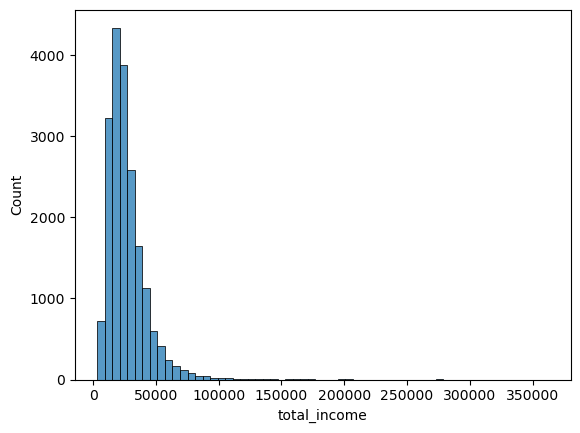

In [63]:
sns.histplot(df, x='total_income', bins=60)

Podemos observar en la distribución que existen valores atípicos, los datos cuentan con asimetría positiva cuya media es mayor que la mediana.

Se decide imputar los valores ausentes de la columna `total_income` por su correspondiente mediana condicionada respecto al nivel de educación (característica analizada antes).

In [64]:
#  función para completar valores ausentes

def fillna_total_income(row):
    row = df.groupby(['education'])['total_income'].transform(
        lambda x: x.fillna(x.median()))
    return row

In [65]:
# Comprueba que la función funciona

nan_index = df[df.total_income.isna()].index
fillna_total_income(df['total_income'])[nan_index].value_counts()

21836.583    1479
28054.531     534
25618.464      69
18741.976      21
Name: total_income, dtype: int64

In [66]:
# Aplícalo la función
df['total_income'] = fillna_total_income(df['total_income'])

In [67]:
# Comprueba los resultados
df.total_income[nan_index].value_counts()

21836.583    1479
28054.531     534
25618.464      69
18741.976      21
Name: total_income, dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     15906 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_group         21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Se realizó el relleno de valores ausentes en la columna `total_income` con medianas de total de ingresos correspondiente al tipo de educación.


* Las medianas usadas son las siguientes: 
    -  `21836.583`  total de registros asignados:       1479
    -  `28054.531`  total de registros asignados:        534
    -  `25618.464`  total de registros asignados:         69
    -  `18741.976`  total de registros asignados:         21
    
    
2103 registros con valores ausentes fueron rellenados.

###  Restaurar valores en `days_employed`<a name="id4.2"></a>

Revisemos la distribución de las medias y medianas de `days_employed` en función de tipo de empleado y edad.

<AxesSubplot: xlabel='income_type'>

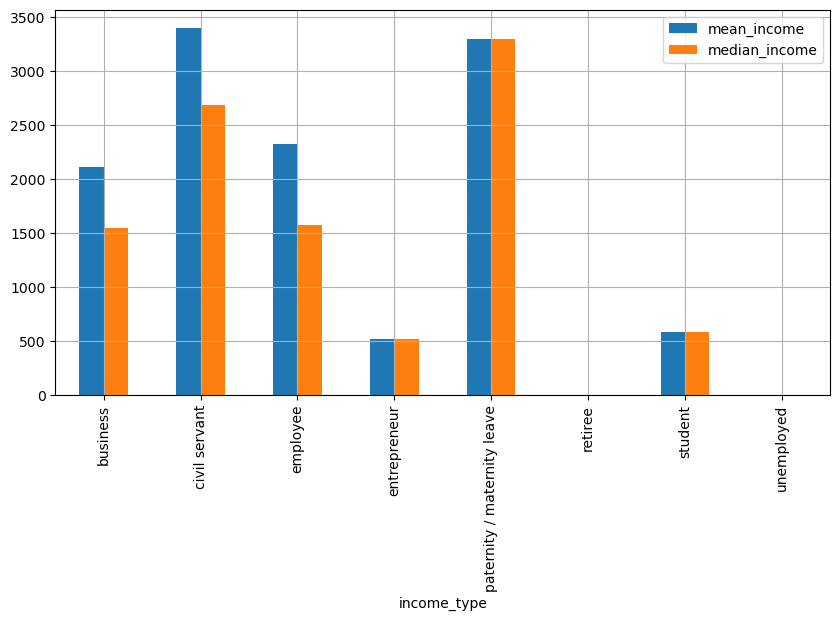

In [69]:
# Revisemos la distribución de días laborados por tipo de trabajo
income_type_days = df.groupby(['income_type']).agg({'days_employed': ['mean', 'median']})
income_type_days.columns = ['mean_income', 'median_income']
income_type_days.plot(kind='bar', figsize=(10, 5), grid=True)

Podemos observar que los tipos de ingresos tienen variados comportamientos respecto a dias laborados.
-  Los paternity / maternity leave, y los civil servant, son los que tienen registrado mayores días laborados. 
-  Los entrepreneur y student tienen el más bajo número de días laborados.
-  Los retiree y unemployed no tienen datos.

<AxesSubplot: xlabel='age_group'>

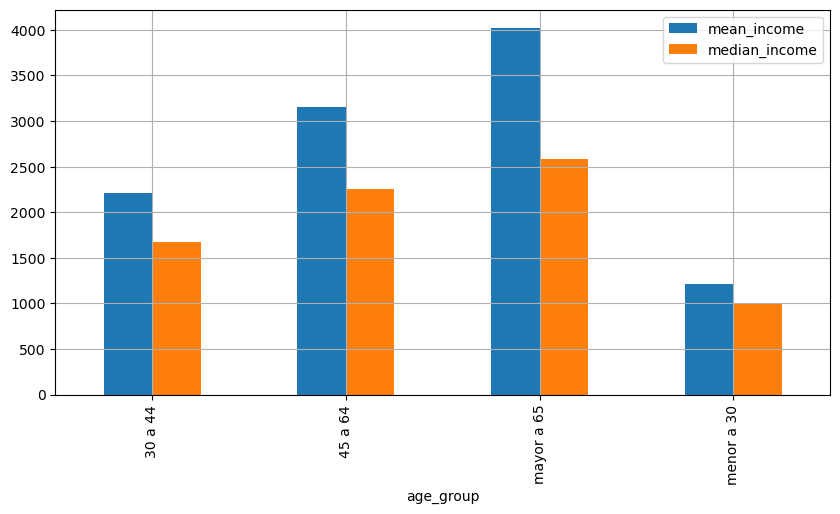

In [70]:
# Revisemos la distribución de `days_employed` por grupos de edades
ages_days_employed = df.groupby(['age_group']).agg({'days_employed': ['mean', 'median']})
ages_days_employed.columns = ['mean_income', 'median_income']
ages_days_employed.plot(kind='bar', figsize=(10, 5), grid=True)

Podemos observar que entre mayor es la edad del cliente el número de días laborales es más alto. Por lo contrario, entre más joven es el cliente menos tiempo a trabajado.

Los días laborales `days_employed` a de variar de acuerdo a distintos aspectos de los clientes. Podemos resumir que:



Los clientes con más días laborados son:
-  Paternity / maternity leave, y Civil servant.
-  Aquellos mayor a 65 años.
 
 
 
Los clientes con menos días laborados son:
-  Aquellos que son emprendedores y estudiantes 
-  Aquellos que tienen menos de 30 años.

Analizamos la distribución de los datos de `days_employed` en el siguiente histograma:

<AxesSubplot: xlabel='days_employed', ylabel='Count'>

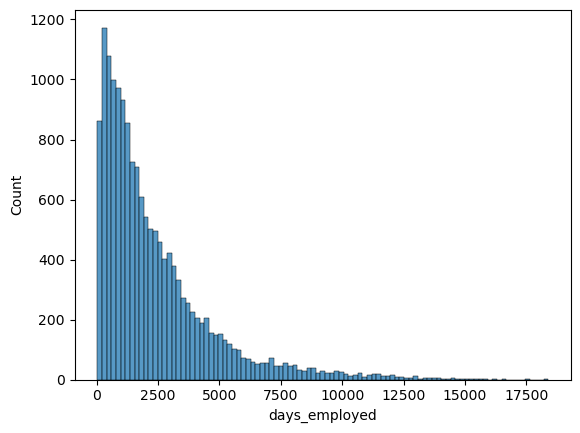

In [71]:
# Histograma de days_employed
sns.histplot(df, x='days_employed')

Podemos observar en la distribución que existen valores atípicos, los datos cuentan con asimetría positiva cuya media es mayor que la mediana.

Se decide imputar los valores ausentes de la columna `days_employed` por su correspondiente mediana condicionada respecto al grupo de edades de los clientes (característica analizada antes).

In [72]:
# Escribamos una función que calcule medianas según el parámetro identificado

def fillna_days_employed(row):
    row = df.groupby(['age_group'])['days_employed'].transform(
        lambda x: x.fillna(x.median()))
    return row

In [73]:
# Comprueba que la función funciona

nan_index_2 = df[df.days_employed.isna()].index
fillna_days_employed(df['days_employed'])[nan_index_2].value_counts()

2254.258990    3329
2579.458493     989
1674.726020     927
996.761544      303
Name: days_employed, dtype: int64

In [74]:
# Aplicar la función a days_employed
df['days_employed'] = fillna_days_employed(df['days_employed'])

In [75]:
# Comprueba si la función funcionó
df.days_employed[nan_index_2].value_counts()

2254.258990    3329
2579.458493     989
1674.726020     927
996.761544      303
Name: days_employed, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  age_group         21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Se realizó el relleno de valores ausentes en la columna `days_employed` con la mediana de days_employed condicionada de acuerdo al grupo de edad.


* Las medianas usadas son las siguientes:   
    -  `2254.258990`   total de registros asignados:  3329
    -  `2579.458493`   total de registros asignados:   989
    -  `1674.726020`   total de registros asignados:   927
    -  `996.761544`    total de registros asignados:   303


Se rellenaron 5548 registros NaN en la columna days_employed. Finalmente, nuestro dataset ya no cuenta con valores ausentes.

## Clasificación de datos<a name="id5"></a>

Para encontrar los datos relevantes y mejorar el análisis en las hipótesis, crearemos varias categorias organizando los datos de acuerdo a:
-   su propósito, 
-   número de hijos,
-   rangos de ingresos salariales.

In [77]:
# Propósitos:
df.purpose.value_counts()

wedding ceremony                            791
having a wedding                            768
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

-  Comprobemos los valores únicos:

In [78]:
# Comprobar los valores únicos
df.purpose.unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

-  Los grupos principales identificados en función de los valores únicos son:
        house
        real estate
        car
        education
        wedding
        

In [79]:
# función para clasificar los propósitos identificados

def purpose_group(row_purpose):
    if ('house' in row_purpose) or ('housing' in row_purpose) or ('property' in row_purpose):
        return 'house'
    if 'real estate' in row_purpose:
        return 'real estate'
    if 'car' in row_purpose:
        return 'car'
    if ('educat' in row_purpose) or ('university' in row_purpose):
        return 'education'
    if 'wedding' in row_purpose:
        return 'wedding'
    else:
        return 'other'

In [80]:
# nueva columna purpose_group
df['purpose_group'] = df.purpose.apply(purpose_group)

In [81]:
df.purpose_group.value_counts()

house          6347
real estate    4464
car            4306
education      4013
wedding        2324
Name: purpose_group, dtype: int64

In [82]:
# Rangos salariales
df.total_income.describe()

count     21454.000000
mean      26466.156267
std       15701.145024
min        3306.762000
25%       17219.817250
50%       22583.630500
75%       31330.237250
max      362496.645000
Name: total_income, dtype: float64

Se realizará una segmentación de ingresos con los siguientes rangos salariales:

-  less 15K
-  15k - 20k
-  20k - 30k
-  more 30k


In [83]:
# función para clasificar nivel de ingresos

def income_group(income):
    if income < 15000:
        return 'less 15k'
    if 15000 <= income < 20000:
        return '15k - 20k'
    if 20000 <= income < 30000:
        return '20k - 30k'
    else:
        return 'more 30k'

In [84]:
# nueva columna children_group

df['income_group'] = df.total_income.apply(income_group)

In [85]:
df.income_group.value_counts()

20k - 30k    8145
more 30k     5919
less 15k     3743
15k - 20k    3647
Name: income_group, dtype: int64

In [86]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,purpose_group,income_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,30 a 44,house,more 30k
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30 a 44,car,15k - 20k
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30 a 44,house,20k - 30k
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30 a 44,education,more 30k
4,0,2254.258990,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,45 a 64,wedding,20k - 30k
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,menor a 30,house,more 30k
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,30 a 44,house,more 30k
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,45 a 64,education,20k - 30k
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,30 a 44,wedding,15k - 20k
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,30 a 44,house,20k - 30k


Se crearon 2 columnas donde se categorizaron los datos por propósito, número de hijos y los rangos salariales. Las columnas creadas fueron: `purpose_group` e `income_group`.

La categorización de los registros se realizó de la siguiente manera:
* `purpose_group`
                house          6347
                real estate    4464
                car            4306
                education      4013
                wedding        2324   
    
* `income_group`
               20k - 30k     8145
                more 30k     5919
                less 15k     3743
                15k - 20k    3647

## Comprobación de las hipótesis<a name="id6"></a>


In [87]:
total_debt = (df.debt.value_counts()/len(df))[1]
print(f' {total_debt:.2%}')

 8.12%


El total de clientes que incumplieron a tiempo el pago de sus préstamos es del 8.12%. Ahora revisemos la correlación de pagar o no a tiempo sus préstamos con número de hijos, estado familiar, rango salarial y propósito del préstamo.

**¿Existe una correlación entre tener hijos y pagar a tiempo?**

In [88]:
# Comprueba los datos sobre los hijos y los pagos puntuales

# Total de clientes por hijos
total_children_group = df['children'].value_counts()

children_debt = df.groupby('children').agg({'debt': 'sum'})

# Calcula la tasa de incumplimiento en función del número de hijos
children_debt['debt_%'] = ((children_debt['debt'] / total_children_group)*100).round(2)

# ... ordenamos de mayor a menor
children_debt.sort_values(by='debt_%', ascending=False, inplace=True)

# ... mostremos
children_debt.style.bar(color='#99EBB8')

#children_debt.plot(kind='bar', figsize=(10, 5), grid=True)

,debt,debt_%
children,,
4,4,9.760000
2,194,9.450000
1,444,9.230000
3,27,8.180000
0,1072,7.540000
5,0,0.000000


In [89]:
df.debt.corr(df.children).round(2)

0.02

**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

In [90]:
# Comprueba los datos del estado familiar y los pagos a tiempo

# Total de clientes por estado familiar
total_family_status = df['family_status'].value_counts()

family_status_debt = df.groupby('family_status').agg({'debt': 'sum'})

# Calcular la tasa de incumplimiento basada en el estado familiar
family_status_debt['debt_%'] = (family_status_debt['debt'] / total_family_status)*100

# ... ordenamos de mayor a menor
family_status_debt.sort_values(by='debt_%', ascending=False, inplace=True)

# ... mostremos
family_status_debt.style.bar(color='#99EBB8')

,debt,debt_%
family_status,,
unmarried,274,9.750890
civil partnership,388,9.347145
married,931,7.545182
divorced,85,7.112971
widow / widower,63,6.569343


**Conclusión**

Los clientes solteros tienen un mayor riesgo de incumplir sus pagos a tiempo, por lo contrario los viudos tienen menor riesgo de incumplir.

Nivel de riesgo de incumplimiento:

-  **Alto riesgo:** solteros y unión civil
-  **Bajo riesgo:** viudos, divorciados y casados

**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

In [91]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo

# Total de clientes por niveles de ingresos
total_income_group = df['income_group'].value_counts()

# Comprueba los datos del nivel de ingresos y los pagos a tiempo
income_debt = df.groupby('income_group').agg({'debt': 'sum'})

# Calcular la tasa de incumplimiento basada en el nivel de ingresos
income_debt['debt_%'] = (income_debt['debt'] / total_income_group)*100

# ... ordenamos de mayor a menor
income_debt.sort_values(by='debt_%', ascending=False, inplace=True)

# ... mostremos
income_debt.style.bar(color='#99EBB8')

,debt,debt_%
income_group,,
15k - 20k,313,8.582396
20k - 30k,694,8.520565
less 15k,298,7.961528
more 30k,436,7.366109


**Conclusión**

Los clientes que perciben entre 15k a 20k salario mensual tienden a ser un poco más incumplidos de lo normal en el pagos a tiempo de sus préstamos, mientras que los que tienen salarios mensuales mayores a 30k tienen menor riesgo de incumplimiento.

Nivel de riesgo de incumplimiento:

-  **Alto riesgo:** clientes con rangos salariales mensuales de 15k-30k
-  **Bajo riesgo:** clientes con rangos salariales menor a 15k, y mayor a 30k

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

In [92]:
# Total de clientes por propósito
total_purpose_group = df['purpose_group'].value_counts()

# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos
purpose_debt = df.groupby('purpose_group').agg({'debt': 'sum'})

# ... calculamos la tasa de incumplimientos de pagos por los clientes según su propósito
purpose_debt['debt_%'] = (purpose_debt['debt'] / total_purpose_group)*100

# ... ordenamos de mayor a menor
purpose_debt.sort_values(by='debt_%', ascending=False, inplace=True)

# ... mostremos
purpose_debt.style.bar(color='#99EBB8')

,debt,debt_%
purpose_group,,
car,403,9.359034
education,370,9.220035
wedding,186,8.003442
real estate,336,7.526882
house,446,7.026942


**Conclusión**

Los clientes cuyo propósito del préstamo fue comprar un vehículo tienen el mayor riesgo de incumplir el pago a tiempo de su deuda, y los clientes cuyo proposito fue adquirir una casa tienen el menor riesgo de incumplimiento.

Nivel de riesgo de incumplimiento:

-  **Alto riesgo:** propósito carro y educación
-  **Riesgo normal:** propósito boda
-  **Bajo riesgo:** bienes raices y casa



## Conclusión general<a name="id7"></a>



*Preprocesamiento de los datos:*

Se realizaron diversas transformaciones de los datos. Corregimos escrituras de datos cambiando a minúsculas las categorías de educación. Se corrigieron datos problemáticos en número de hijos: -1 y 20 por 0. Se corrigieron valores negativos en la columna days_employed y se transformaron valores atípicamente grandes por NaN y posteriormente se realizó el tratamiento de NaN. Se corrigieron valores 0 de edad por 43 (la mediana). Se eliminaron 72 registros duplicados. El conjunto de datos total disminuyó de 21525 a 21454.


Los valores ausentes de las columnas `days_employed` y `total_income` fueron imputados por medianas condicionadas puesto que los datos no tenían una distribución normal y era cambiante de acuerdo a otras características relacionadas a estas columnas. El relleno de los NaN se realizó así:

        -  En days_employed con medianas condicionadas de acuerdo al nivel de educación.
        -  En total_income con medianas condicionadas de acuerdo al grupos de edad.


Se realizó categorización de datos para un mejor análisis, creando las columnas: age_group, purpose_group y income_group.
   
 
 

**¿Existe una correlación entre tener hijos y pagar a tiempo?**

Los clientes que tienen 4 hijos representan un grupo riesgoso para el cumplimiento tiempo de sus préstamos. Por lo contrario, los clientes que no tienen hijos presentan el menor riesgo de incumplimiento. Los clientes que tienen 5 hijos no representan riesgos.



**¿Existe una correlación entre la situación familiar y el pago a tiempo?**

Los clientes solteros es un grupo riesgoso en el cumplimiento a tiempo, los viudos son un grupo menos riesgoso de lo normal.



**¿Existe una correlación entre el nivel de ingresos y el pago a tiempo?**

Los clientes que perciben entre 15k a 20k salario mensual tienden a ser un poco más incumplidos de lo normal en el pagos a tiempo de sus préstamos, mientras que los que tienen salarios mensuales mayores a 30k representa un grupo menos riesgoso respecto al resto de clientes.

    

**¿Cómo afecta el propósito del crédito a la tasa de incumplimiento?**

Los clientes que prestaron dinero para adquirir un vehículo representan un grupo altamente riesgoso para cumplir el pago a tiempo de su deuda, y los clientes cuyo propósito fue adquirir una casa tienen el menor riesgo de incumplimiento.
